##Import Files

In [5]:
from google.colab import files
upload=files.upload()

Saving nyc_data_cleaned.csv to nyc_data_cleaned.csv


In [3]:
from sb_utils import save_file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [27]:
nyc_data_analysis=pd.read_csv('/content/nyc_data_cleaned.csv')
nyc_data_analysis.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.373221                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

In [28]:
nyc_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [29]:
nyc_data_analysis.shape

(48895, 16)

In [30]:
nyc_data_analysis.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [31]:
nyc_data_analysis.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

##Null Values

In [32]:
nyc_data_analysis.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#Drop Null Columns

In [12]:
#nyc_data_analysis.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)
nyc_data_analysis.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

In [13]:
nyc_data_analysis.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Fill Null Values

In [33]:
nyc_data_analysis.fillna('0', inplace=True)

In [34]:
nyc_data_analysis.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##Most Listings in each Neighbourhood

In [148]:
#Neighbourhood have the most listings
nyc_data_analysis['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood')

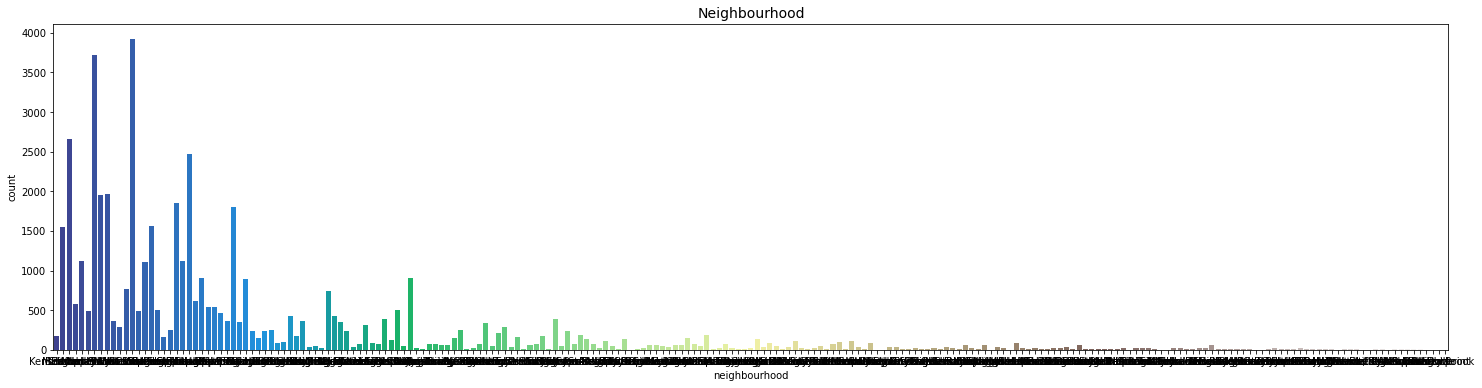

In [82]:
sns.countplot(nyc_data_analysis['neighbourhood'], palette="terrain")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood', size = 14)

##Most Listings in each Neighbourhood Group

In [147]:
#Neighbourhood group have the most listings
nyc_data_analysis['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

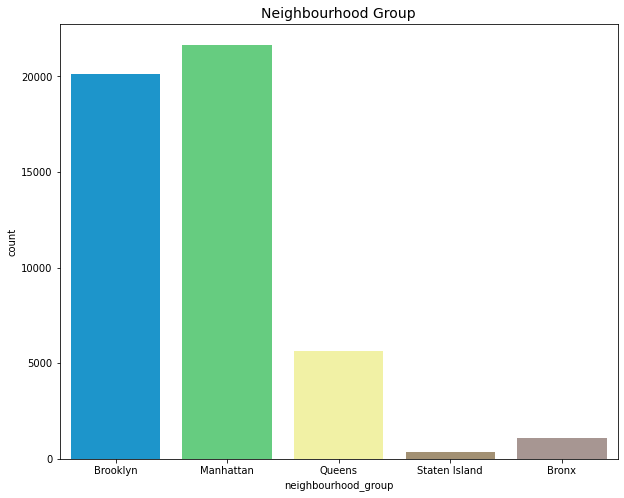

In [79]:
sns.countplot(nyc_data_analysis['neighbourhood_group'], palette="terrain")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Neighbourhood Group', size = 14)

##Number of Room Types

In [37]:
nyc_data_analysis['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [38]:
nyc_data_analysis.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.497775   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.280000   
50%          3.000000           5.000000           1.220000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

##Unique Values

In [39]:
#examining the unique values
nyc_data_analysis.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

##Neighbourhood Group

In [146]:
#Neighbourhood group have the most listings
top_host_listing=nyc_data_analysis.neighbourhood_group.value_counts()
top_host_listing

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [145]:
#Neighbourhood have the most listings
top_host_listing=nyc_data_analysis.neighbourhood.value_counts()
top_host_listing

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

##Average Price per Unit

Text(0.5, 0, 'Number of Units')

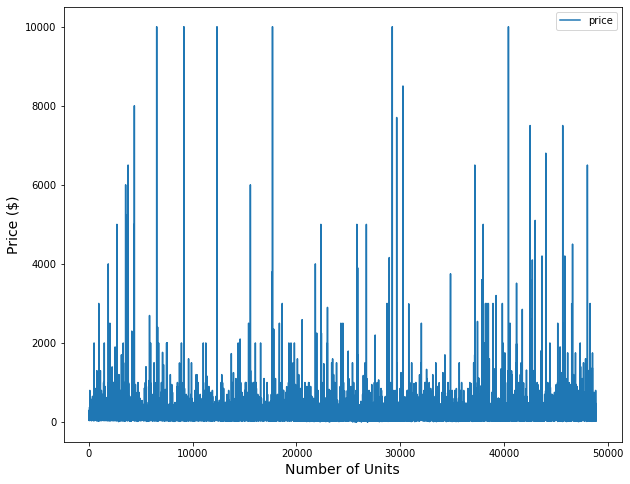

In [42]:
nyc_data_analysis.plot(y='price', figsize=(10,8))
plt.ylabel('Price ($)', size = 14)
plt.xlabel('Number of Units', size = 14)

##Average Price per Unit Type

Text(0.5, 0, 'Room Type')

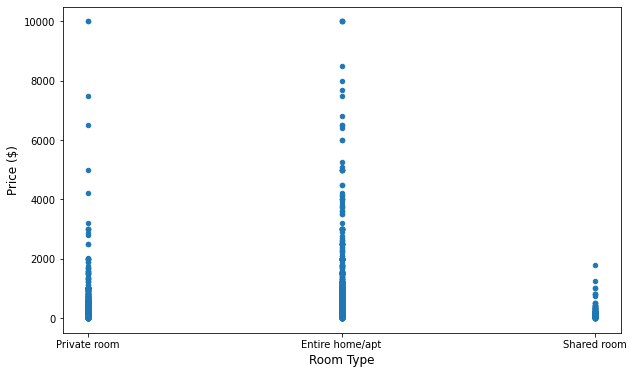

In [43]:
nyc_data_analysis.plot.scatter(x='room_type', y='price', figsize=(10,6))
plt.ylabel('Price ($)', size = 12)
plt.xlabel('Room Type', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Room Type')

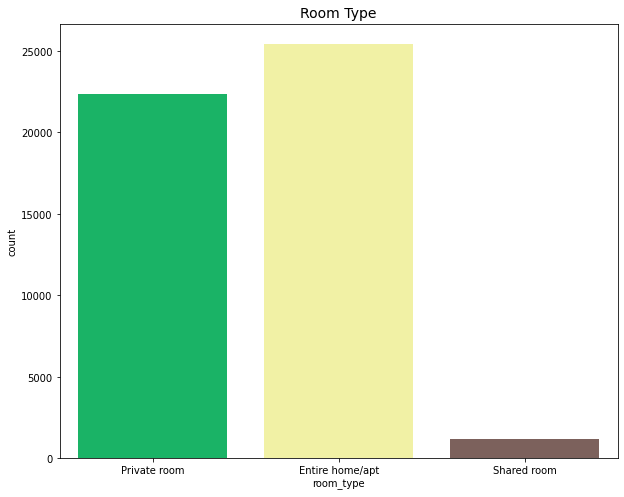

In [84]:
sns.countplot(nyc_data_analysis['room_type'], palette="terrain")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Room Type', size = 14)

##Analysis for Unit Price < $500

In [85]:
unit_under_500 = nyc_data_analysis[nyc_data_analysis.price < 500]

##Unit Geographical Location

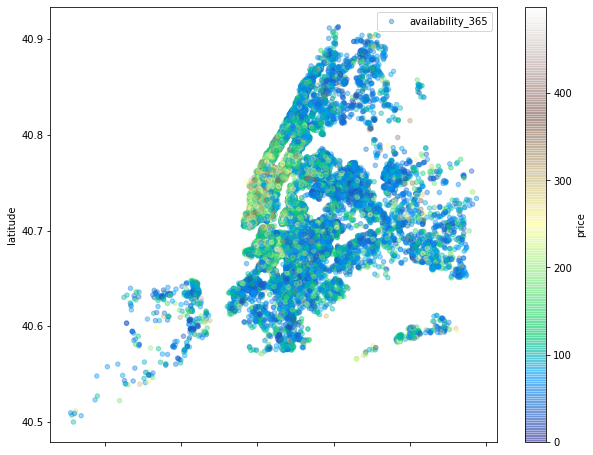

In [114]:
location_plot=unit_under_500.plot(kind='scatter', x='longitude', y='latitude', c='price', label='availability_365', 
                  cmap=plt.get_cmap('terrain'), colorbar=True, alpha=0.4, figsize=(10,8))
location_plot.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


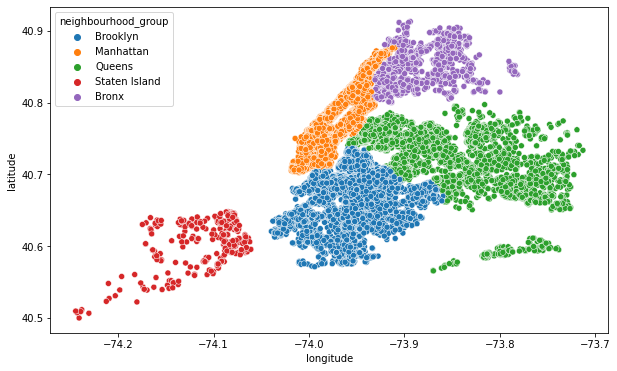

In [104]:
plt.figure(figsize=(10,6))
sns.scatterplot(nyc_data_analysis.longitude, nyc_data_analysis.latitude, hue=nyc_data_analysis.neighbourhood_group)
plt.ioff() #turn interactive mode off, doesn't accept any parameter
#plt.show()

##Unit Geographical Location on the Map

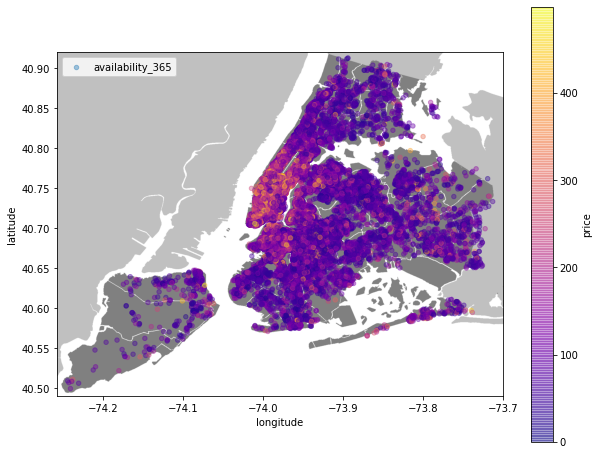

In [137]:
import urllib

plt.figure(figsize=(10,8))
#loading the NYC image found on Google
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#latitude and longitude max and mins
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

unit_under_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('plasma'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

##Room Type

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


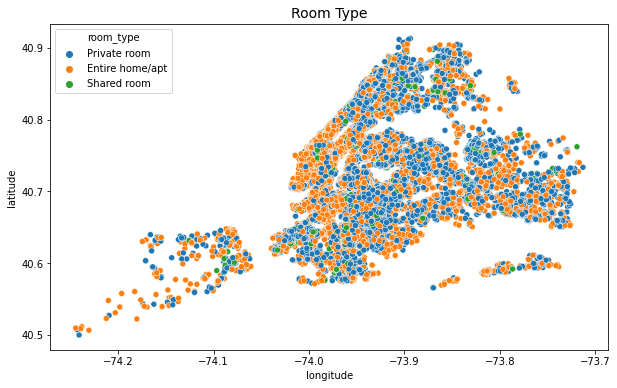

In [106]:
plt.figure(figsize = (10,6))
sns.scatterplot(nyc_data_analysis.longitude, nyc_data_analysis.latitude, hue = nyc_data_analysis.room_type)
plt.title('Room Type', size = 14)
plt.ioff()

##Room Availability

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


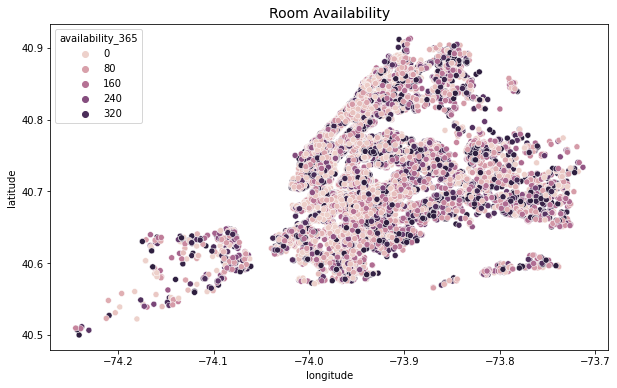

In [107]:
plt.figure(figsize=(10,6))
sns.scatterplot(nyc_data_analysis.longitude, nyc_data_analysis.latitude, hue=nyc_data_analysis.availability_365)
plt.title('Room Availability', size = 14)
plt.ioff()

##Neighbourhood Group Availability

Text(0.5, 1.0, 'Neighbourhood Group Availability')

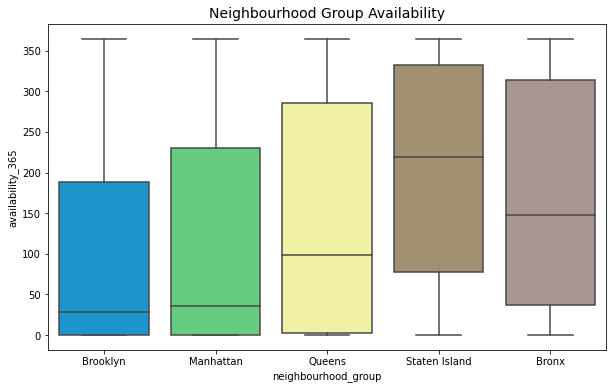

In [117]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=nyc_data_analysis, x='neighbourhood_group', y='availability_365', palette='terrain')
plt.title('Neighbourhood Group Availability', size = 14)

##Neighbourhood Group Word Cloud

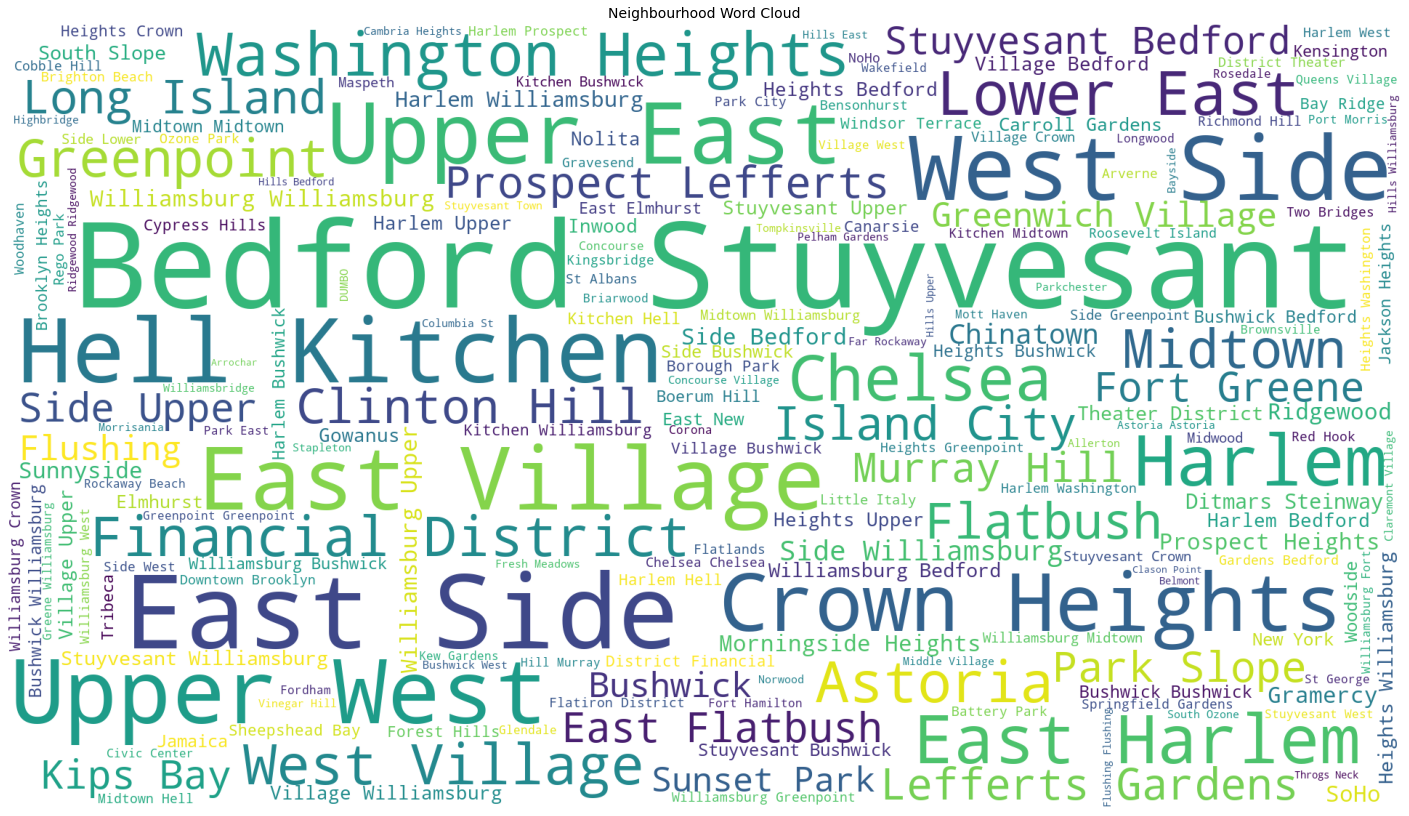

In [144]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(nyc_data_analysis.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Neighbourhood Word Cloud', size = 14)
plt.show()

##Percentage of Room Distribution in each Neighbourhood Group

In [149]:
import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

for group in nyc_data_analysis['neighbourhood_group'].unique():
    # Select data of a particular group/category
    data = nyc_data_analysis[nyc_data_analysis['neighbourhood_group']==group]
    
    title = f"Distribution Of Room Type In {group} Neighbourhood"
    fig = px.pie(data,names='room_type',hole=0.75,title=title)
    fig.show()

##Continous Variable Relationship with the Price (target variable)

In [150]:
def parallel_coordinate(nyc_data_analysis,target,con_cols):
    fig = px.parallel_coordinates(nyc_data_analysis, color=target,dimensions=con_cols,color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
    return fig

In [151]:
fig = parallel_coordinate(nyc_data_analysis,'price',['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365'])
fig.show()

##Correlation Matrix shows Positive and Negative Relationship between Different Variables

In [152]:
def plotCorrelationMatrix(nyc_data_analysis, graphWidth):
   
    filename = nyc_data_analysis
    df = nyc_data_analysis.dropna('columns') # drop columns with NaN
    df = nyc_data_analysis[[col for col in nyc_data_analysis if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if nyc_data_analysis.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({nyc_data_analysis.shape[1]}) is less than 2')
        return
    corr = nyc_data_analysis.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
  
    plt.title('Correlation Matrix Plot',size = 16)
    plt.show()

<ipython-input-152-e42aa3334024>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



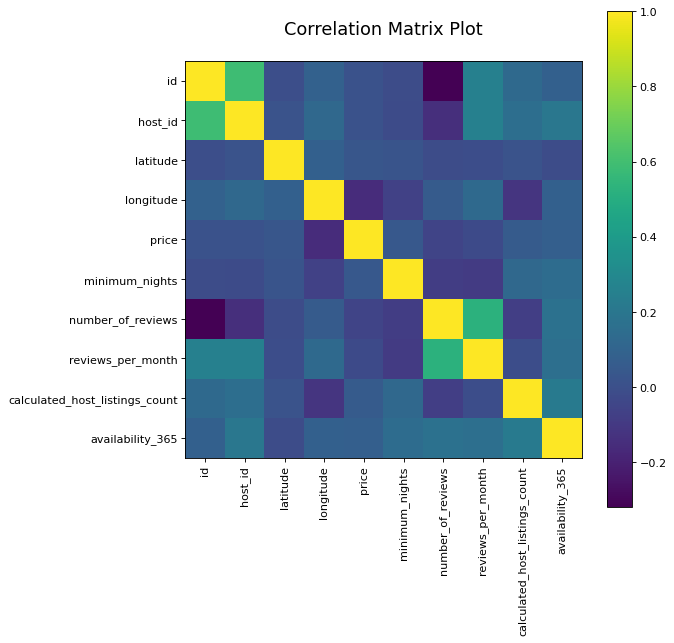

In [153]:
plotCorrelationMatrix(nyc_data_analysis,8);

##Correlation Matrix with Kendall Rank Correlation Coefficent Method

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

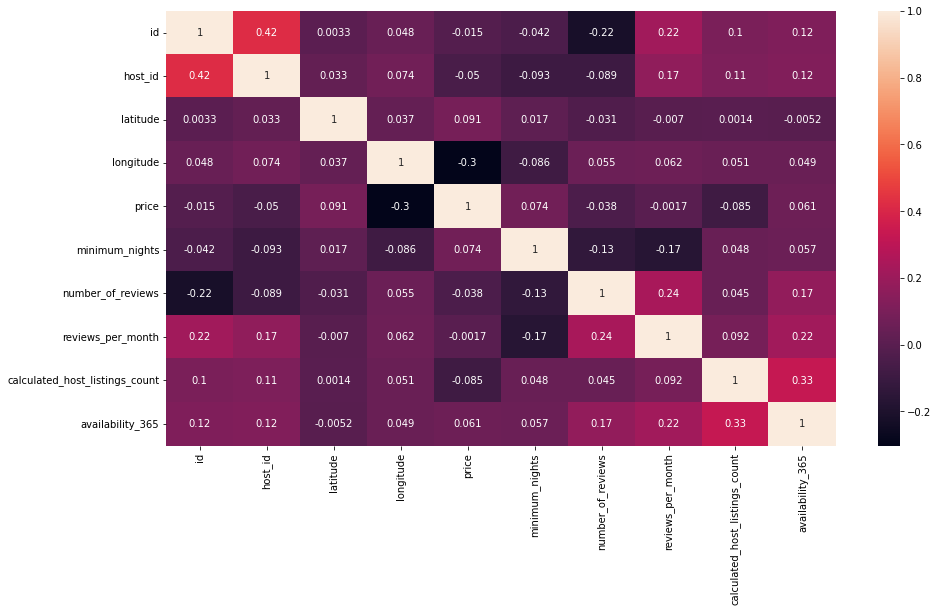

In [154]:
corr = nyc_data_analysis.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
nyc_data_analysis.columns

##Scatter Matrix Plot between Different Variables shows how multiple variables are related

In [69]:
import numpy as np

In [142]:
def plotScatterMatrix(nyc_data_analysis, plotSize, textSize):
    df = nyc_data_analysis.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that are null
    df = nyc_data_analysis.dropna('columns')
    df = nyc_data_analysis[[col for col in nyc_data_analysis if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(nyc_data_analysis)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion
        columnNames = columnNames[:10]
    df = nyc_data_analysis[columnNames]
    ax = pd.plotting.scatter_matrix(nyc_data_analysis, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = nyc_data_analysis.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot', size = 16)
    plt.show()

<ipython-input-142-8ad0e3bf7457>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



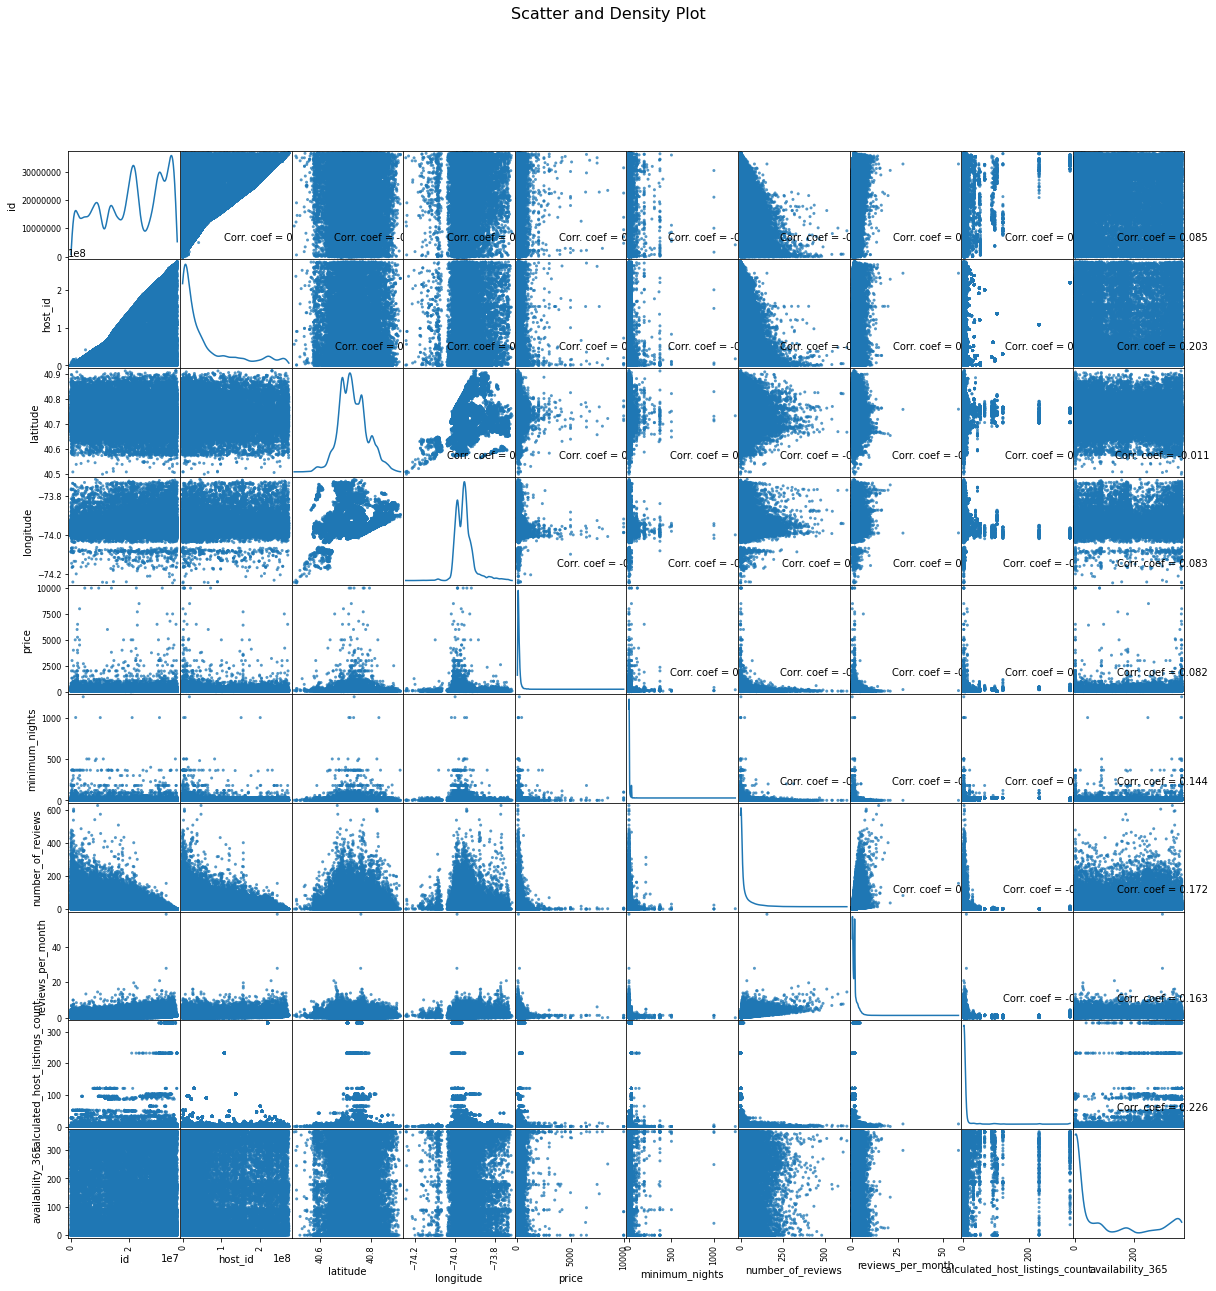

In [143]:
plotScatterMatrix(nyc_data_analysis, 20, 10)

##Save New File

In [136]:
# save the data to a new csv file
datapath = '../data'
save_file(nyc_data_analysis, 'nyc_data_after_EDA.csv', datapath)

Directory ../data was created.
Writing file.  "../data/nyc_data_after_EDA.csv"
